Frequency analysis 
===================

In this report we analyze the frequency content of the measurements for every $20^{th}$ file from 06.01.2016 to 30.04.2016. The idea is to get a feeling of how the different variables may separated into groups in terms of frequency. Also it will show us the highest sampling frequency among the variables and give us a rough idea of how much information we loose if we round of the timestamps to the nearest second

First we import some necessary Python libraries

In [4]:
#%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

# To import files from another folder
import sys
sys.path.append('../')
import filehandler as fh
import datahandler as dh
import datastruct as ds

# Make the graphs a bit prettier, and bigger
#plt.style.use('ggplot')

tls.set_credentials_file(username='erling.singstad.paulsen', api_key='x53zd71ajl')

## Displaying DataFrame with frequencies
Now we want to display our DataFrame, consisting of the $10^{th}$, $25^{th}$, $50^{th}$, $75^{th}$, $90^{th}$ percentiles of the frequencies and the mean frequency of the variables. These values are based on every $\Delta t$ between two consecutive measurements for a variable.

In [5]:
df = fh.loadDataH5('../data/struct_freq_only/', 'freq_every_20th_file.h5')
df

,MG2TE201/Meas1/PRIM,MG4TE517/Meas1/PRIM,MG2PT401/Meas1/PRIM,MG2TE272/Meas1/PRIM,MG4TE705/Meas1/PRIM,SP058/Meas1/PRIM,EG005/Meas1/PRIM,IBS009/Meas1/PRIM,SW012/OutRunning/PRIM,MG1PT201/Meas1/PRIM,...,CA004/Meas1/PRIM,MG2TE703/Meas1/PRIM,MI210/Meas1/PRIM,EG009/Meas1/PRIM,RG020/Meas1/PRIM,MP2068/Meas1/PRIM,RD118/Meas1/PRIM,LC007/Meas1/PRIM,MG3TE101/Meas1/PRIM,GC_S1_COMP_N2/Meas1/PRIM
10th,0.076923,0.000046,0.111111,0.083333,0.000046,0.100000,0.499750,0.000046,0.001667,0.000484,...,0.003731,0.090909,0.099083,0.000047,0.200040,0.004348,0.062496,0.500000,0.200000,0.001047
25th,0.200000,0.000046,0.250000,0.200000,0.000046,0.166694,0.990099,0.000064,0.001667,0.000536,...,0.011765,0.250000,0.497760,0.000061,0.333333,0.008696,0.125016,0.999001,0.333333,0.001948
50th,0.500000,0.000046,0.498753,0.500000,0.000046,0.333333,0.999001,0.000109,0.001667,0.001757,...,0.040000,0.500000,0.999001,0.000129,0.500000,0.015151,0.250063,1.000000,0.500000,0.003155
75th,1.000000,0.000046,0.500250,1.000000,0.000046,0.500250,1.001001,0.000370,0.001667,0.065128,...,0.250063,1.000000,1.000000,0.004068,1.000000,0.028572,0.500000,1.000000,1.000000,0.003185
90th,1.000000,0.000046,1.000000,1.000000,0.000046,1.000000,1.002004,0.024415,0.001667,0.200000,...,1.000000,1.000000,1.001001,0.010223,1.000000,0.052643,1.000000,1.001001,1.000000,0.003236
Mean,0.540679,0.000046,0.482008,0.555661,0.000046,0.433469,0.871604,0.004856,0.002018,0.066342,...,0.230596,0.609109,0.732927,0.003705,0.616135,0.028280,0.389252,0.910849,0.647512,0.003016


## Plotting percentiles and mean
Now we want to display this information in an interactive graph to explore the frequencies of the different variables. By plotting all the percentiles and the mean we get an overview of how much the frequencies varies for each variable. Also we see that most of the variables are measured at $1Hz$ and lower, but some few variables are reaching $10Hz$ on the $90^{th}$ percentile.

In [6]:
color = ['#1F77B4', '#D62728', '#2CA02C', '#E377C2', '#BCBD22', '#17BECF', '#444444'] # blue, red, greed, magenta, yellow, cyan, black
labels = [ds.tag2name(tag) for tag in df.columns]

fig = plt.figure(figsize=(50,5))
ax = fig.add_subplot(111)
x = np.arange(338)+1

for i,index in enumerate(df.index):
    ax.plot(x, df.loc[index], color=color[i], label=index)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_title('Frequency percentiles for every 20th file during 4 month period', fontsize = 24)
ax.set_ylabel('$Hz$', fontsize = 18)
ax.grid()

plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig['layout'].update({'xaxis':{'ticktext': labels,'tickvals': x, 'tickfont': {'size': 10},'tickangle': -90},
                             'yaxis':{'tickvals': range(12),'tickfont': {'size': 14}, 'title':'$Hz$'},
                             'width':4000, 'height':600, 'margin':{'l':50, 'r':50, 'b':300},
                             'legend':{'x':0.01, 'borderwidth':1}, 'showlegend':True,
                             'dragmode':'pan'})
py.iplot(plotly_fig, filename='frequency-all')

## Plotting sorted mean frequency
By sorting the mean frequencies we can visualize it even better and begin to see groupings in terms of the different systems that the variables belongs to.

In [8]:
df_sorted_mean = df.T.sort_values('Mean', ascending=True).T
labels2 = [ds.tag2name(tag) for tag in df_sorted_mean.columns]

fig2 = plt.figure(figsize=(100,10))
ax2 = fig2.add_subplot(111)

ax2.bar(x, df_sorted_mean.loc['Mean'], color=color[5])
ax2.set_xticks(x)
ax2.set_xticklabels(labels2, rotation='vertical')
ax2.set_title('Frequency mean sorted for every 20th file during 4 month period - Normal scale', fontsize = 24)
ax2.set_ylabel('$Hz$', fontsize = 18)

plotly_fig2 = tls.mpl_to_plotly(fig2)
plotly_fig2['layout'].update({'xaxis':{'ticktext': labels2,'tickvals': x, 'tickfont': {'size': 10},'tickangle': -90},
                              'yaxis':{'tickvals': range(12),'tickfont': {'size': 14}, 'title':'$Hz$'},
                              'width':4000, 'height':600, 'margin':{'l':50, 'r':50, 'b':300},
                              'legend':{'x':0.01, 'borderwidth':1}, 'showlegend':True,
                              'dragmode':'pan'})
plotly_fig2['data'][0].update({'name':'Mean'})
py.iplot(plotly_fig2, filename='sorted-mean-freq')

PlotlyError: Hey there! You've hit one of our API request limits. 

To get unlimited API calls(10,000/day), please upgrade to a paid plan. 

UPGRADE HERE: https://goo.gl/i7glmM 

Thanks for using Plotly! Happy Plotting!

## Grouping variables into 3 groups
Based on the sorted mean frequencies we could decide to group the variables into three groupings:
* Low frequency: $\quad 0 \leq Hz \leq 0.01$
* Mid frequency: $\quad 0.01 \leq Hz \leq 1.5$
* High frequency: $\quad 1.5 \leq Hz$

First we find the variable groups based on the thresholds.

In [ ]:
group1 = []
group2 = []
group3 = []
for col in df_sorted_mean.columns:
    if df_sorted_mean.loc['Mean', col] < 0.01:
        group1.append(col)
    elif (df_sorted_mean.loc['Mean', col] > 0.01) and (df_sorted_mean.loc['Mean', col] < 1.5):
        group2.append(col)
    else:
        group3.append(col)

Then we make an ineractive plot to visualize the groupings with different colors.

In [88]:
n1 = len(group1)
n2 = len(group1)+len(group2)
n3 = len(group1)+len(group2)+len(group3)

fig3 = plt.figure(figsize=(100,10))
ax3 = fig3.add_subplot(111)

ax3.bar(x[0:n1], df_sorted_mean.loc['Mean', group1], color=color[1], label='Group 1')
ax3.bar(x[n1:n2], df_sorted_mean.loc['Mean', group2], color=color[2], label='Group 2')
ax3.bar(x[n2:n3], df_sorted_mean.loc['Mean', group3], color=color[3], label='Group 3')
ax3.plot(x, np.ones(len(x))*0.01, 'k--', linewidth=2)
ax3.plot(x, np.ones(len(x))*1.5, 'k--', linewidth=2)

ax3.set_xticks(x)
ax3.set_xticklabels(labels2, rotation='vertical')
ax3.set_title('Frequency mean sorted for every 20th file during 4 month period - Normal scale - 3 Groups', fontsize = 24)
ax3.set_ylabel('$Hz$', fontsize = 18)

plotly_fig3 = tls.mpl_to_plotly(fig3)
plotly_fig3['layout'].update({'xaxis':{'ticktext': labels2,'tickvals': x, 'tickfont': {'size': 10},'tickangle': -90},
                              'yaxis':{'tickvals': range(12),'tickfont': {'size': 14}, 'title':'$Hz$'},
                              'width':4000, 'height':600, 'margin':{'l':50, 'r':50, 'b':300},
                              'legend':{'x':0.01, 'borderwidth':1}, 'showlegend':True,
                              'dragmode':'pan'})
plotly_fig3['data'][0].update({'name':'0.01'})
plotly_fig3['data'][1].update({'name':'1.5'})
plotly_fig3['data'][2].update({'name':'Group 1'})
plotly_fig3['data'][3].update({'name':'Group 2'})
plotly_fig3['data'][4].update({'name':'Group 3'})
py.iplot(plotly_fig3, filename='sorted-mean-freq-grouped')

## Plotting sorted mean frequency using log scale
To better visualize the differences between the low frequency variables we can plot the mean frequencies with a logarithmic y-axis. 

In [3]:
fig4 = plt.figure(figsize=(100,10))
ax4 = fig4.add_subplot(111)

ax4.bar(x, df_sorted_mean.loc['Mean'], color=color[5], label='Mean')

ax4.set_yscale('log')
ax4.set_xticks(x)
ax4.set_yticks([0.0001, 0.001, 0.01, 0.1, 1, 10])
ax4.set_xticklabels([ds.tag2name(tag) for tag in df_sorted_mean.columns], rotation='vertical')
ax4.set_title('Frequency mean sorted for every 20th file during 4 month period - Logarithmic scale', fontsize = 24)
ax4.set_ylabel('$Hz$', fontsize = 18)

plotly_fig4 = tls.mpl_to_plotly(fig4)
plotly_fig4['layout'].update({'xaxis':{'ticktext': labels2,'tickvals': x, 'tickfont': {'size': 10},'tickangle': -90},
                              'yaxis':{'tickfont': {'size': 14}, 'title':'$Hz$', 'type':'log', 'autorange':True},
                              'width':4000, 'height':600, 'margin':{'l':50, 'r':50, 'b':300},
                              'legend':{'x':0.01, 'borderwidth':1}, 'showlegend':True,
                              'dragmode':'pan'})
plotly_fig4['data'][0].update({'name':'Mean'})
py.iplot(plotly_fig4, filename='sorted-mean-freq-log')
#'tickvals':[0, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1], 

NameError: name 'plt' is not defined

## Grouping variables into 4 groups based on log scaling

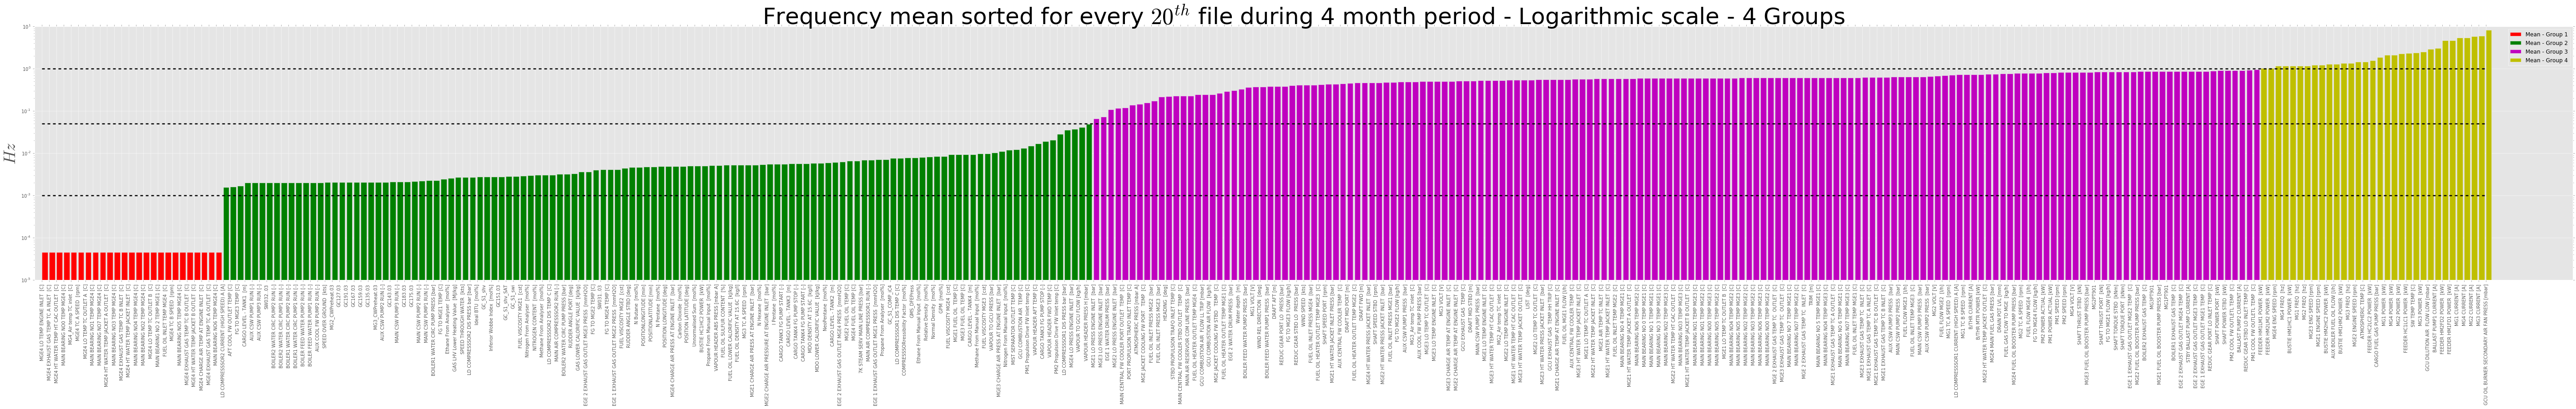

In [59]:
group1_log = []
group2_log = []
group3_log = []
group4_log = []
for col in df_sorted_mean.columns:
    if df_sorted_mean.loc['Mean', col] < 0.001:
        group1_log.append(col)
    elif (df_sorted_mean.loc['Mean', col] > 0.001) and (df_sorted_mean.loc['Mean', col] < 0.05):
        group2_log.append(col)
    elif (df_sorted_mean.loc['Mean', col] > 0.05) and (df_sorted_mean.loc['Mean', col] < 1):
        group3_log.append(col)
    else:
        group4_log.append(col)

n1 = len(group1_log)
n2 = len(group1_log)+len(group2_log)
n3 = len(group1_log)+len(group2_log)+len(group3_log)
n4 = len(group1_log)+len(group2_log)+len(group3_log)+len(group4_log)

fig5 = plt.figure(figsize=(100,10))
ax5 = fig5.add_subplot(111)

ax5.bar(x[0:n1], df_sorted_mean.loc['Mean', group1_log], color=color[1], label='Mean - Group 1')
ax5.bar(x[n1:n2], df_sorted_mean.loc['Mean', group2_log], color=color[2], label='Mean - Group 2')
ax5.bar(x[n2:n3], df_sorted_mean.loc['Mean', group3_log], color=color[3], label='Mean - Group 3')
ax5.bar(x[n3:n4], df_sorted_mean.loc['Mean', group4_log], color=color[4], label='Mean - Group 4')
ax5.plot(x, np.ones(len(x))*0.001, 'k--', linewidth=2.5)
ax5.plot(x, np.ones(len(x))*0.05, 'k--', linewidth=2.5)
ax5.plot(x, np.ones(len(x))*1, 'k--', linewidth=2.5)

ax5.set_yscale('log')
ax5.set_xticks(x)
ax5.set_xticklabels([ds.tag2name(tag) for tag in df_sorted_mean.columns], rotation='vertical')
ax5.set_title('Frequency mean sorted for every $20^{th}$ file during 4 month period - Logarithmic scale - 4 Groups', fontsize = 50)
ax5.set_ylabel('$Hz$', fontsize = 36)
ax5.legend()

# Saving figures

In [60]:
fig.savefig('figures/frequencies.pdf',bbox_inches='tight')
fig2.savefig('figures/frequency_mean_sorted.pdf',bbox_inches='tight')
fig3.savefig('figures/frquency_group_normal.pdf',bbox_inches='tight')
fig4.savefig('figures/frquency_mean_sorted_log.pdf',bbox_inches='tight')
fig5.savefig('figures/frquency_group_log.pdf',bbox_inches='tight')

# Saving groupings as txt files

In [61]:
fh.saveColumn(group1,'group1')
fh.saveColumn(group2,'group2')
fh.saveColumn(group3,'group3')
fh.saveColumn(group1_log,'group1_log')
fh.saveColumn(group2_log,'group2_log')
fh.saveColumn(group3_log,'group3_log')
fh.saveColumn(group4_log,'group4_log')